MuSpAn domain loaded successfully. Domain summary:
Domain name: Mouse cells
Number of objects: 6676
Collections: ['Cell centres']
Labels: ['Celltype', 'CD4'] 
Networks: [] 
Distance matrices: []


(<Figure size 1000x800 with 2 Axes>, <Axes: >)

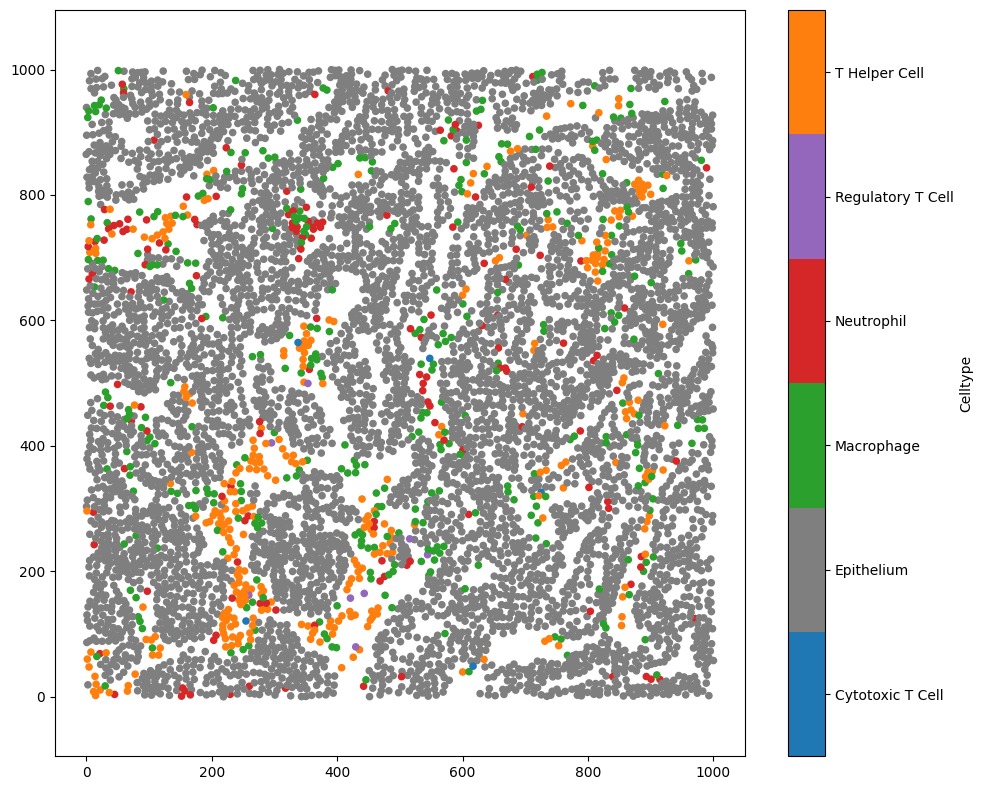

In [1]:
# Import necessary libraries
import muspan as ms
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Load example domain dataset
example_domain = ms.datasets.load_example_domain('Mouse-Colon-Carcinoma')

# Visualise the example domain, coloring by 'Celltype'
ms.visualise.visualise(example_domain, color_by='Celltype')


(<Figure size 1000x700 with 2 Axes>, <Axes: >)

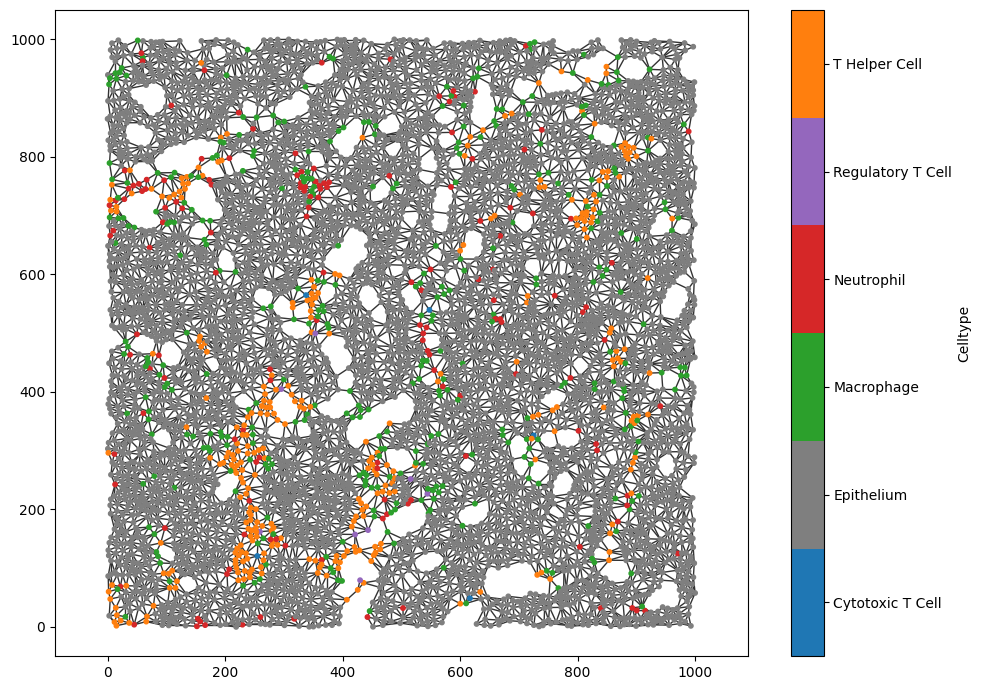

In [2]:
# Generate the 'Centroid Delaunay' network for the example domain
ms.networks.generate_network(
    example_domain,
    network_name='Centroid Delaunay',
    network_type='Delaunay',
    max_edge_distance=30
)

# Visualise the generated network, coloring by 'Celltype'
ms.visualise.visualise_network(
    example_domain,
    network_name='Centroid Delaunay',
    visualise_kwargs=dict(color_by='Celltype', marker_size=10),
    figure_kwargs=dict(figsize=(10, 7))
)

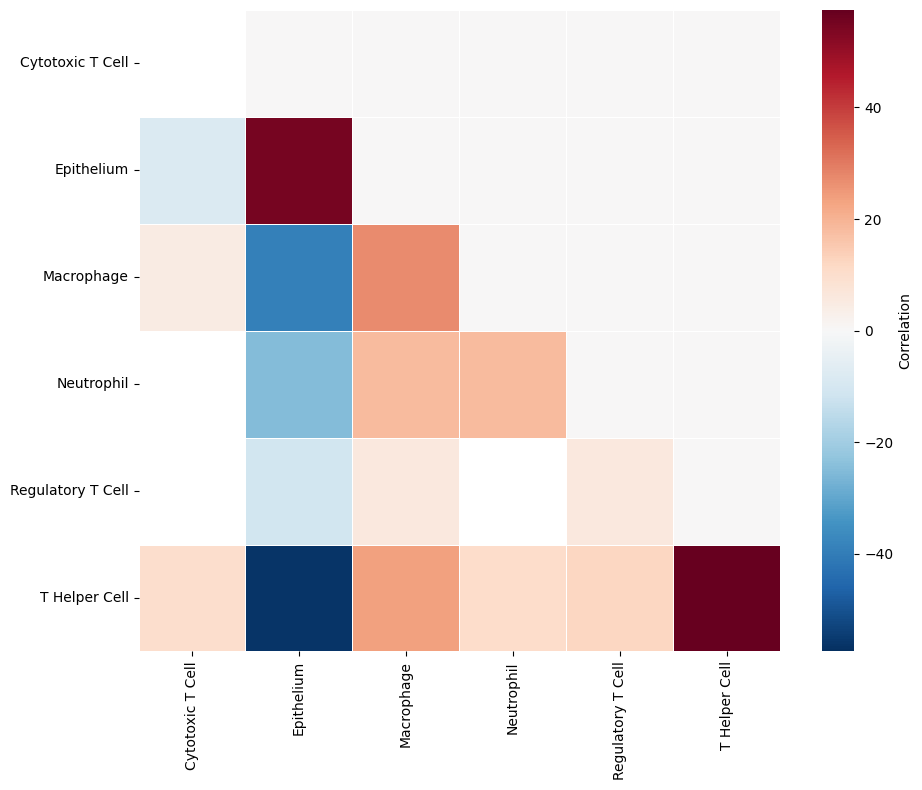

In [3]:
# run the adjacency permutation test on the whole domain
ses,ses_a,lab_cats = ms.networks.adjacency_permutation_test(example_domain,
                                                            network_name='Centroid Delaunay',
                                                            label_name='Celltype',
                                                            observation_threshold=0,
                                                            visualise_output=True)

(<Figure size 1000x700 with 3 Axes>, <Axes: >)

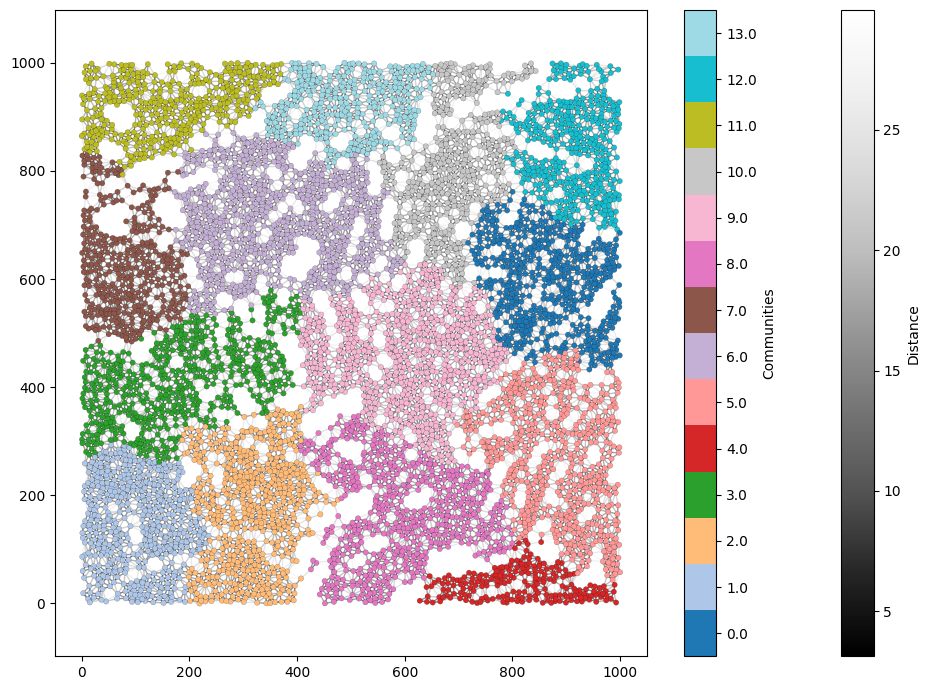

In [4]:
# Perform community detection using the Louvain method with a resolution of 1
communities_dict=ms.networks.community_detection(
    example_domain,
    network_name='Centroid Delaunay',
    edge_weight_name=None,
    community_method='louvain',
    community_method_parameters=dict(resolution=0.25),
    community_label_name='Communities'
)

# Visualise the network with communities detected at resolution 1
ms.visualise.visualise_network(
    example_domain,
    network_name='Centroid Delaunay',
    edge_weight_name='Distance',
    visualise_kwargs=dict(
        color_by='Communities',
        marker_size=15,
        scatter_kwargs=dict(linewidth=0.1, edgecolor='black')
    ),
    figure_kwargs=dict(figsize=(10, 7))
)

In [5]:
# Get the list of community IDs from the communities dictionary
community_ids = list(communities_dict.keys())

# Iterate over each community ID
for id in community_ids:
    
    # Run the adjacency permutation test for the current community
    this_ses, this_ses_a, this_lab_cats = ms.networks.adjacency_permutation_test(
        example_domain,
        network_name='Centroid Delaunay',
        label_name='Celltype',
        observation_threshold=0,
        population=('Communities', id)
    )  
    
    # Create a name for the current community
    this_community_name = f'Community {id}' 
    
    # Convert objects in the example domain for the current community
    example_domain.convert_objects(
        population=('Communities', id),
        collection_name=this_community_name,
        object_type='shape',
        conversion_method='alpha shape',
        conversion_method_kwargs={'alpha': 20}
    )
    
    # Iterate over each label category for the current community
    for cat_a in this_lab_cats:
        for cat_b in this_lab_cats:
            # Create a label name for the comparison between two categories
            this_label_name = f'APT: {cat_a} vs {cat_b}'
            
            # Get the value for the current label from the SES matrix
            this_value = this_ses[this_lab_cats == cat_a, this_lab_cats == cat_b][0]
            
            # Add the label to the example domain for the current community
            example_domain.add_labels(
                this_label_name,
                [this_value],
                add_labels_to=('collection', this_community_name),
                cmap='bwr'
            )
    


(<Figure size 1000x800 with 2 Axes>, <Axes: >)

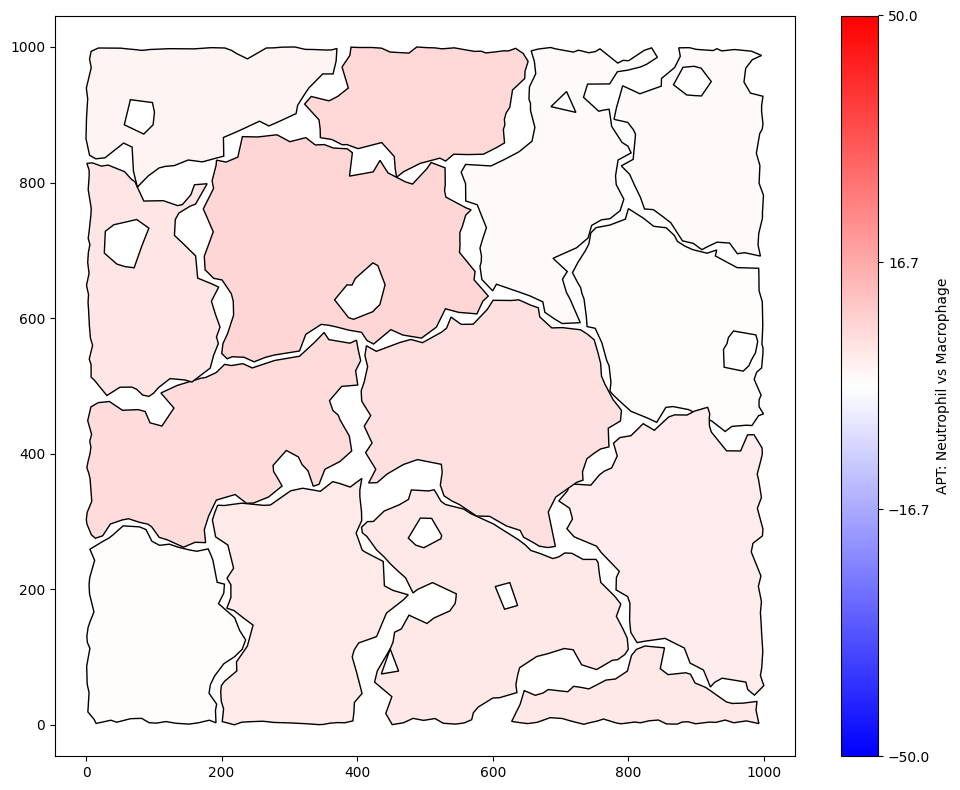

In [6]:
# visualise the results for a specific community
ms.visualise.visualise(example_domain,
                       objects_to_plot=('object','shape'),
                       shape_kwargs=dict(alpha=1),
                       color_by='APT: Neutrophil vs Macrophage',
                       vmin=-50,
                       vmax=50)